# Notebook : Modèle de Prédiction de Diabète (Régression Logistique)

## 1. Importation des bibliothèques

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import joblib
import os

## 2. Chargement du dataset

In [35]:
df = pd.read_csv(r"D:\Projets\Diabete_Regression\diabete_prediction_dataset.csv") 
print("Taille initiale :", df.shape)

Taille initiale : (100000, 9)


## 3. Exploration rapide

In [36]:
display(df.head())
print(df.info())
print(df.isna().sum())
print("Doublons :", df.duplicated().sum())

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Doublons : 3854


### a. Suppression des doublons

In [37]:
df = df.drop_duplicates()

## 4. Analyse exploratoire visuelle

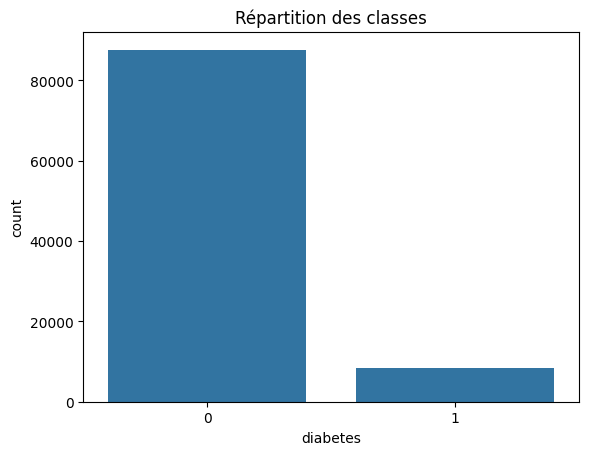

In [38]:
sns.countplot(x="diabetes", data=df)
plt.title("Répartition des classes")
plt.show()

## 5. Préparation des données

In [39]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

### a. Transformation : OneHotEncoder sur variables catégorielles

In [40]:
categorical_features = ["gender", "smoking_history"]
transformation = ColumnTransformer(
    [
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder="passthrough"
)

X_trans = transformation.fit_transform(X)

### b. Normalisation

In [41]:
normalisation = MinMaxScaler()
X_scaled = normalisation.fit_transform(X_trans)

## 6. Découpage train/test

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 7. Entraînement du modèle

In [43]:
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## 8. Évaluation

In [44]:
train_acc = model.score(X_train, y_train)
test_acc = accuracy_score(y_test, model.predict(X_test))
f1 = f1_score(y_test, model.predict(X_test))

In [45]:
print(f"Précision entraînement : {train_acc:.2%}")
print(f"Précision test : {test_acc:.2%}")
print(f"F1-score : {f1:.2%}")

Précision entraînement : 95.93%
Précision test : 95.74%
F1-score : 72.32%


### a. Matrice de confusion

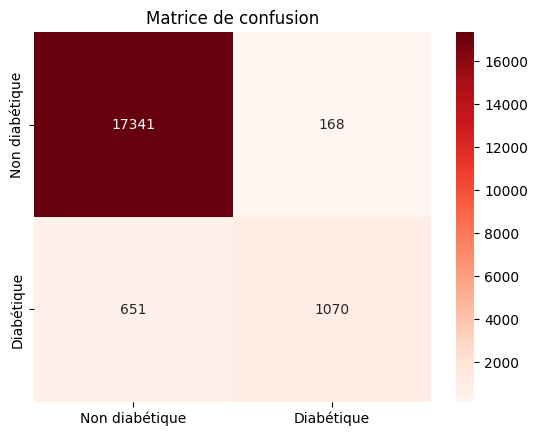

In [51]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Non diabétique", "Diabétique"], yticklabels=["Non diabétique", "Diabétique"])
plt.title("Matrice de confusion")
plt.show()

### b. Rapport de classification

In [52]:
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.62      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230

